In [1]:
from tqdm import trange, notebook

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
import os 
from glob import glob

In [3]:
# train_y - code

In [4]:
data_list = glob('./CIFAR100/train/*.png')

In [5]:
def get_label_from_path(path):
    labelpath1 = path.split('\\')[-1]
    labelpath2 = labelpath1.split('.')[-2]
    labelpath3 = labelpath2.split('_')[1:]
    labelpath4 = "_".join(labelpath3)
    return labelpath4

In [6]:
label_name_list = []
for path in data_list:
    label_name_list.append(get_label_from_path(path))

In [7]:
unique_label_names = np.unique(label_name_list)

In [8]:
print(unique_label_names, len(unique_label_names))

['apple' 'aquarium_fish' 'baby' 'bear' 'beaver' 'bed' 'bee' 'beetle'
 'bicycle' 'bottle' 'bowl' 'boy' 'bridge' 'bus' 'butterfly' 'camel' 'can'
 'castle' 'caterpillar' 'cattle' 'chair' 'chimpanzee' 'clock' 'cloud'
 'cockroach' 'couch' 'crab' 'crocodile' 'cup' 'dinosaur' 'dolphin'
 'elephant' 'flatfish' 'forest' 'fox' 'girl' 'hamster' 'house' 'kangaroo'
 'keyboard' 'lamp' 'lawn_mower' 'leopard' 'lion' 'lizard' 'lobster' 'man'
 'maple_tree' 'motorcycle' 'mountain' 'mouse' 'mushroom' 'oak_tree'
 'orange' 'orchid' 'otter' 'palm_tree' 'pear' 'pickup_truck' 'pine_tree'
 'plain' 'plate' 'poppy' 'porcupine' 'possum' 'rabbit' 'raccoon' 'ray'
 'road' 'rocket' 'rose' 'sea' 'seal' 'shark' 'shrew' 'skunk' 'skyscraper'
 'snail' 'snake' 'spider' 'squirrel' 'streetcar' 'sunflower'
 'sweet_pepper' 'table' 'tank' 'telephone' 'television' 'tiger' 'tractor'
 'train' 'trout' 'tulip' 'turtle' 'wardrobe' 'whale' 'willow_tree' 'wolf'
 'woman' 'worm'] 100


In [9]:
unique_label_num = []
a = 0
for temp in range(len(unique_label_names)):
    unique_label_num.append(a)
    a+=1

In [10]:
unique_label_num_array = np.array(unique_label_num)

In [11]:
train_y_list = []
for label_name_index in range(len(label_name_list)):
    for unique_label_name_index in range(len(unique_label_names)):
        if (label_name_list[label_name_index] == unique_label_names[unique_label_name_index]):
            train_y_list.append(unique_label_name_index)
train_y = np.array(train_y_list)

In [12]:
#train_x - code

In [13]:
paths = tf.io.matching_files('./CIFAR100/train/*.png')

In [14]:
paths

<tf.Tensor: shape=(50000,), dtype=string, numpy=
array([b'.\\CIFAR100\\train\\0_cattle.png',
       b'.\\CIFAR100\\train\\10000_motorcycle.png',
       b'.\\CIFAR100\\train\\10001_snail.png', ...,
       b'.\\CIFAR100\\train\\999_willow_tree.png',
       b'.\\CIFAR100\\train\\99_turtle.png',
       b'.\\CIFAR100\\train\\9_elephant.png'], dtype=object)>

In [15]:
def tf_read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype=tf.float32)
    return image

In [16]:
def make_batch(batch_paths):
    batch_images = []
    for path in batch_paths:
        image = tf_read_image(path)
        batch_images.append(image)
    return tf.convert_to_tensor(batch_images)

In [17]:
train_x = make_batch(paths)

In [18]:
train_x

<tf.Tensor: shape=(50000, 32, 32, 3), dtype=float32, numpy=
array([[[[1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         [1.        , 1.        , 1.        ],
         ...,
         [0.7647059 , 0.8039216 , 0.75686276],
         [0.83137256, 0.8784314 , 0.8       ],
         [0.7137255 , 0.7607843 , 0.654902  ]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [0.99607843, 0.99607843, 0.99607843],
         ...,
         [0.6666667 , 0.6901961 , 0.5882353 ],
         [0.6313726 , 0.65882355, 0.50980395],
         [0.57254905, 0.6039216 , 0.44313726]],

        [[1.        , 1.        , 1.        ],
         [0.99607843, 0.99607843, 0.99607843],
         [1.        , 1.        , 1.        ],
         ...,
         [0.7411765 , 0.78039217, 0.6627451 ],
         [0.6509804 , 0.69803923, 0.50980395],
         [0.4745098 , 0.52156866, 0.34117648]],

        ...,

        [[0.5803922 , 0.7254902 

In [19]:
train_x.shape, train_y.shape

(TensorShape([50000, 32, 32, 3]), (50000,))

In [20]:
# test_x - code

In [21]:
test_path = tf.io.matching_files('./CIFAR100/test/*.png')

In [22]:
test_x = make_batch(test_path)

In [23]:
test_x, test_x.shape

(<tf.Tensor: shape=(10000, 32, 32, 3), dtype=float32, numpy=
 array([[[[0.78039217, 0.84313726, 0.9764706 ],
          [0.76862746, 0.827451  , 0.95686275],
          [0.7647059 , 0.8235294 , 0.9529412 ],
          ...,
          [0.84705883, 0.90588236, 0.98039216],
          [0.8509804 , 0.90588236, 0.98039216],
          [0.8784314 , 0.91764706, 0.9882353 ]],
 
         [[0.77254903, 0.8235294 , 0.9372549 ],
          [0.7647059 , 0.8156863 , 0.93333334],
          [0.7647059 , 0.8235294 , 0.9411765 ],
          ...,
          [0.90588236, 0.9529412 , 0.98039216],
          [0.9137255 , 0.9529412 , 0.98039216],
          [0.94509804, 0.9607843 , 0.99215686]],
 
         [[0.87058824, 0.8862745 , 0.9647059 ],
          [0.8352941 , 0.8627451 , 0.9490196 ],
          [0.81960785, 0.85882354, 0.9529412 ],
          ...,
          [0.9529412 , 0.98039216, 0.9843137 ],
          [0.95686275, 0.9764706 , 0.9843137 ],
          [0.98039216, 0.98039216, 0.99215686]],
 
         ...,
 
     

In [24]:
# test_y - code

In [25]:
test_data_list = glob('./CIFAR100/test/*.png')

In [26]:
test_label_name_list = []
for path in test_data_list:
    test_label_name_list.append(get_label_from_path(path))

In [27]:
test_unique_label_names = np.unique(test_label_name_list)

In [28]:
print(test_unique_label_names, len(test_unique_label_names))

['apple' 'aquarium_fish' 'baby' 'bear' 'beaver' 'bed' 'bee' 'beetle'
 'bicycle' 'bottle' 'bowl' 'boy' 'bridge' 'bus' 'butterfly' 'camel' 'can'
 'castle' 'caterpillar' 'cattle' 'chair' 'chimpanzee' 'clock' 'cloud'
 'cockroach' 'couch' 'crab' 'crocodile' 'cup' 'dinosaur' 'dolphin'
 'elephant' 'flatfish' 'forest' 'fox' 'girl' 'hamster' 'house' 'kangaroo'
 'keyboard' 'lamp' 'lawn_mower' 'leopard' 'lion' 'lizard' 'lobster' 'man'
 'maple_tree' 'motorcycle' 'mountain' 'mouse' 'mushroom' 'oak_tree'
 'orange' 'orchid' 'otter' 'palm_tree' 'pear' 'pickup_truck' 'pine_tree'
 'plain' 'plate' 'poppy' 'porcupine' 'possum' 'rabbit' 'raccoon' 'ray'
 'road' 'rocket' 'rose' 'sea' 'seal' 'shark' 'shrew' 'skunk' 'skyscraper'
 'snail' 'snake' 'spider' 'squirrel' 'streetcar' 'sunflower'
 'sweet_pepper' 'table' 'tank' 'telephone' 'television' 'tiger' 'tractor'
 'train' 'trout' 'tulip' 'turtle' 'wardrobe' 'whale' 'willow_tree' 'wolf'
 'woman' 'worm'] 100


In [29]:
len(test_label_name_list)

10000

In [30]:
test_unique_label_num = []
a = 0
for temp in range(len(test_unique_label_names)):
    test_unique_label_num.append(a)
    a+=1

In [31]:
test_unique_label_names = np.unique(test_label_name_list)

In [32]:
test_y_list = []
for test_label_name_index in range(len(test_label_name_list)):
    for test_unique_label_name_index in range(len(test_unique_label_names)):
        if (test_label_name_list[test_label_name_index] == test_unique_label_names[test_unique_label_name_index]):
            test_y_list.append(test_unique_label_name_index)
test_y = np.array(test_y_list)

In [33]:
test_y, test_y.shape

(array([49, 65, 67, ..., 91, 35,  0]), (10000,))

In [34]:
# model declaration and compile

In [35]:
input_shape = (32,32,3)
num_classes = 100

In [36]:
def Mymodel(input_shape, num_classes):
    
    myinput = tf.keras.layers.Input(shape=input_shape)
    
    net= tf.keras.layers.Conv2D(32,3,1,padding='same',activation='relu')(myinput)
    net= tf.keras.layers.Conv2D(32,3,1,padding='same',activation='relu')(net)
    net = tf.keras.layers.MaxPool2D(pool_size=(2,2))(net)
    net = tf.keras.layers.Dropout(0.2)(net)
    
    net= tf.keras.layers.Conv2D(64,3,1,padding='same',activation='relu')(myinput)
    net= tf.keras.layers.Conv2D(64,3,1,padding='same',activation='relu')(net)
    net = tf.keras.layers.MaxPool2D(pool_size=(2,2))(net)
    net = tf.keras.layers.Dropout(0.2)(net)
    
    net= tf.keras.layers.Flatten()(net)
    net= tf.keras.layers.Dense(512, activation='relu')(net)
    net = tf.keras.layers.Dropout(0.3)(net)
    net = tf.keras.layers.Dense(num_classes,activation='softmax')(net)
    
    model = tf.keras.Model(inputs=myinput, outputs=net, name="TEST")
    return model

In [37]:
model = Mymodel(input_shape, num_classes)

In [38]:
model.summary()

Model: "TEST"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               8389120

In [39]:
model.compile(optimizer=tf.keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [56]:
b_size = 32
num_epochs = 20
history = model.fit(train_x, train_y,validation_data=(test_x,test_y), batch_size = b_size, shuffle = True, epochs = num_epochs, callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)])

Epoch 1/20
1563/1563 [==============================] - 165s 106ms/step - loss: 1.8692 - accuracy: 0.4911 - val_loss: 2.4936 - val_accuracy: 0.3846
Epoch 2/20
1563/1563 [==============================] - 172s 110ms/step - loss: 1.3997 - accuracy: 0.6048 - val_loss: 2.6317 - val_accuracy: 0.3774
Epoch 3/20
1563/1563 [==============================] - 169s 108ms/step - loss: 1.1307 - accuracy: 0.6703 - val_loss: 2.7512 - val_accuracy: 0.3899


In [42]:
model.save('cifar100.h5')

In [43]:
# result sumation

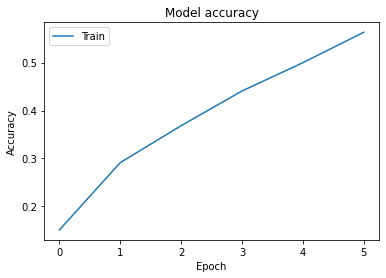

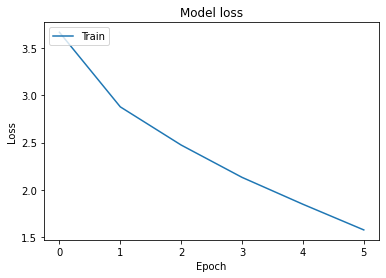

In [44]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
 
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [45]:
# model prediction

In [46]:
result = model.evaluate(test_x,test_y)

313/313 [==============================] - 8s 24ms/step - loss: 2.4149 - accuracy: 0.4007


In [47]:
prediction = model.predict(test_x)

In [48]:
def draw_img(x) :
  plt.figure()
  plt.imshow(x)
  plt.show()

6807
3
bear
squirrel


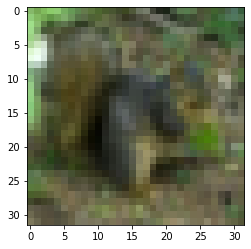

In [55]:
import random
image_number = random.randint(0,9999)
answer = np.argmax(prediction[image_number])
print(image_number) #train_x
print(answer) #train_y (=label-number)
print(unique_label_names[answer]) # test_x
print(test_unique_label_names[test_y[image_number]]) #test_y
draw_img(test_x[image_number])

In [50]:
# save model load and data prediction

In [51]:
new_model = keras.models.load_model('cifar100.h5')
new_model.summary()
loss, acc = new_model.evaluate(train_x,  train_y, verbose=2)
print("복원된 모델의 훈련데이터 정확도: {:5.2f}%".format(100*acc))
loss, acc = new_model.evaluate(test_x,  test_y, verbose=2)
print("복원된 모델의 테스트데이터 정확도: {:5.2f}%".format(100*acc))

Model: "TEST"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               8389120